## 데이터 전처리 작업 1
### 데이터 정제하기
#### 정제가 필요한 결측값, 이상값 등이 무엇인지 파악할 수 있다. <br><br> 결측값와 이상값에 대한 처리 기준을 정하고 제거 또는 임의의 값으로 대체할 수 있다.

+ ### 모듈 불러오기

In [91]:
import pandas as pd
import numpy as np

#데이터셋

from sklearn.datasets import load_iris

+ ### 데이터 불러오기

In [92]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [93]:
print(data.shape) # 150개 데이터, 4개 feature & Target

(150, 5)


In [94]:
data.cov() #변수간의 상관성이 존재하는가? 다중공선성 확인하기

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),0.685694,-0.042434,1.274315,0.516271,0.530872
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639,-0.152349
petal length (cm),1.274315,-0.329656,3.116278,1.295609,1.372483
petal width (cm),0.516271,-0.121639,1.295609,0.581006,0.597315
target,0.530872,-0.152349,1.372483,0.597315,0.671141


In [95]:
data.corr() #변수간의 상관성이 얼마나 존재하며 무시해도 되는 정도인가?

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


+ ### 이상치(outlier) 확인 및 처리

식별방법

Boxplot outer fence 벗어난 값 <br>
EDS(Extreme Studentized Deviation) 평균에서 3표준편차 이상 떨어진 값 


처리 방법

레코드 삭제(행 삭제)
대체(상한, 하한으로 조정)

#### Boxplot 식별

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

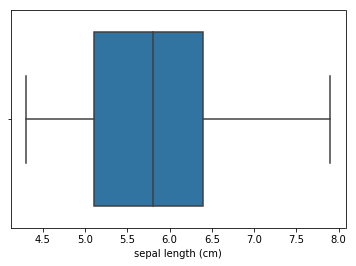

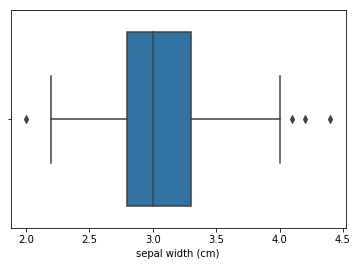

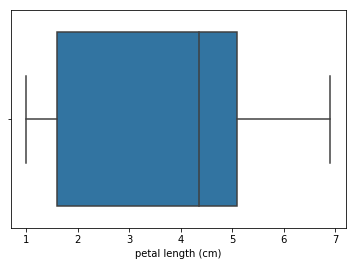

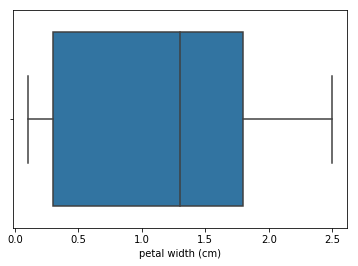

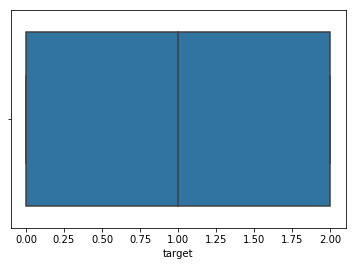

In [97]:
for count,i in enumerate(data.columns):
    sns.boxplot(data[i])
    plt.show()

 sepal width에서만 이상치 발견

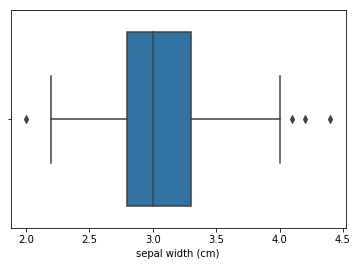

In [98]:
sns.boxplot(data['sepal width (cm)'])

In [99]:
q25, q75 = np.quantile(data['sepal width (cm)'],0.25), np.quantile(data['sepal width (cm)'],0.75)
cut_off = (q75- q25)*1.5 #IQR*1.5

lower = q25 - cut_off 
upper = q75 + cut_off

In [100]:
lower_list = data['sepal width (cm)'][data['sepal width (cm)'] <lower].index.tolist()
upper_list = data['sepal width (cm)'][data['sepal width (cm)'] >upper].index.tolist()
drop_list = lower_list + upper_list

In [101]:
drop_list # lower = 60, upper = 15,32,33

[60, 15, 32, 33]

In [102]:
data.drop(drop_list,axis=0)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [103]:
data['sepal width (cm)'][60] = lower

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
data['sepal width (cm)'][upper_list] = upper

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


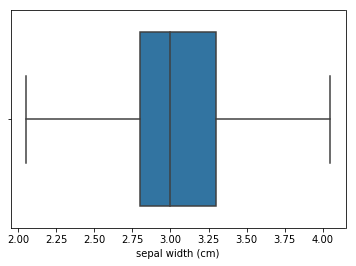

In [105]:
sns.boxplot(data['sepal width (cm)'])

#### ESD 식별

ESD(Extreme Studentized Deviation)

평균으로부터 3 표준편차 떨어진 값(각 0.15%)를 이상치로 판단 - 

In [152]:
for i in data.columns:
    print(i)
    print(sum(data[i] >data[i].mean() + data[i].std()*3 ))
    print(sum(data[i] <data[i].mean() - data[i].std()*3 ))


sepal length (cm)
0
0
sepal width (cm)
0
0
petal length (cm)
0
0
petal width (cm)
0
0
target
0
0
